In [17]:
import os
import glob
import plotly
import numpy as np
from tqdm import tqdm
from collections import defaultdict

In [13]:
def get_train_val_split_videos(root_dir, split_pct=0.2):
    
    #Split explicit_train_val videos
    explicit_videos = glob.glob(os.path.join(root_dir,'explicit/*/video_subclips/*'))
    explicit_indices = list(range(len(explicit_videos)))
    np.random.seed(42)
    np.random.shuffle(explicit_indices)
    explicit_val_split_index = int(len(explicit_videos)*split_pct)
    explicit_videos_val,  explicit_videos_train = [explicit_videos[index] for index in explicit_indices[:explicit_val_split_index]], [explicit_videos[index] for index in explicit_indices[explicit_val_split_index:]]

    #Split non_explicit_train_val videos
    non_explicit_videos = glob.glob(os.path.join(root_dir,'non_explicit/*/video_subclips/*'))
    non_explicit_indices = list(range(len(non_explicit_videos)))
    np.random.shuffle(non_explicit_indices)
    non_explicit_val_split_index = int(len(non_explicit_videos)*split_pct)
    non_explicit_videos_val,  non_explicit_videos_train = [non_explicit_videos[index] for index in non_explicit_indices[:non_explicit_val_split_index]], [non_explicit_videos[index] for index in non_explicit_indices[non_explicit_val_split_index:]]

    #Get the total train_val videos
    train_videos, val_videos = explicit_videos_train+non_explicit_videos_train, explicit_videos_val+non_explicit_videos_val
    print('Explicit train ',len(explicit_videos_train))
    print('Non_explicit train ',len(non_explicit_videos_train))
    print('Explicit val ',len(explicit_videos_val))
    print('Non_explicit val ',len(non_explicit_videos_val))
    
    return train_videos, val_videos, len(explicit_videos_train), len(non_explicit_videos_train)


In [28]:
code_to_class = {'B1': 'Fighting',
'B2': 'Shooting',
'B4': 'Riot',
'B5': 'Abuse',
'B6': 'Car accident',
'G': 'Explosion',
'A':'non-explicit'}

In [29]:
train_videos, val_videos, _, _ = get_train_val_split_videos('/home/<username>/cls_data_1_min/encoded_videos')

Explicit train  521
Non_explicit train  807
Explicit val  130
Non_explicit val  201


In [44]:
train_class_to_count_dict = defaultdict(int)
val_class_to_count_dict = defaultdict(int)

for elem in tqdm(train_videos):
    label_list = list()
    label = elem.split('_')[-2].split('-')
    final_label = ''
    for lab in sorted(label):
        if not lab.isdigit():
            final_label +=code_to_class[lab]+'_'

    train_class_to_count_dict[final_label.strip('_')]+=1

for elem in tqdm(val_videos):
    label_list = list()
    label = elem.split('_')[-2].split('-')
    final_label = ''
    for lab in sorted(label):
        if not lab.isdigit():
            final_label +=code_to_class[lab]+'_'

    val_class_to_count_dict[final_label.strip('_')]+=1    

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 331/331 [00:00<00:00, 488327.34it/s]


In [45]:
assert sum(train_class_to_count_dict.values())==len(train_videos)

In [46]:
assert sum(val_class_to_count_dict.values())==len(val_videos)

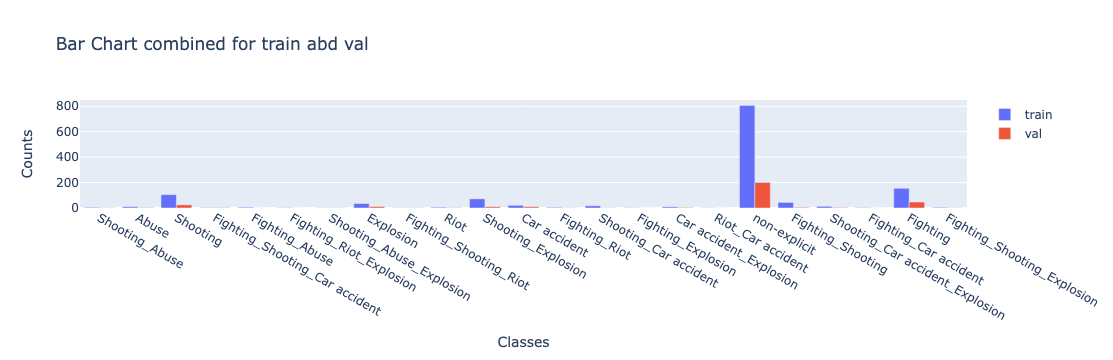

In [52]:
import plotly.graph_objects as go


# Combine the keys and initialize values to 0
combined_keys = set(train_class_to_count_dict.keys()) | set(val_class_to_count_dict.keys())
combined_dict1 = {key: train_class_to_count_dict.get(key, 0) for key in combined_keys}
combined_dict2 = {key: val_class_to_count_dict.get(key, 0) for key in combined_keys}

# Create lists of data from combined dictionaries
labels = list(combined_keys)
values1 = [combined_dict1[key] for key in labels]
values2 = [combined_dict2[key] for key in labels]

# Create traces
trace1 = go.Bar(
    x=labels,
    y=values1,
    name='train'
)
trace2 = go.Bar(
    x=labels,
    y=values2,
    name='val'
)

# Create the figure
fig = go.Figure(data=[trace1, trace2])

# Update layout
fig.update_layout(
    title='Bar Chart combined for train abd val',
    xaxis_title='Classes',
    yaxis_title='Counts'
)

# Show the figure
fig.show()
